<a href="https://colab.research.google.com/github/lwllucas/DS-MachineLearningProjects/blob/master/ITI102_Assignment1_20A490A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science ITI102 20S1 Assignment 1 Question**
##Smartphone Application Dataset Analysis



```
Name: Lim Wei Le Lucas
Admin no: 20A490A
```



## In this Notebook, we are going to analyse the dataset for Smartphone Application

You are given a csv file 'dataset.csv' with all the data    
There are 13 columns in the csv file.    
The first row is the header.    
Following are the description for each column

1.App	
2.Category   
3.Rating  
4.Reviews	
5.Size	
6.Installs	
7.Type	
8.Price	
9.Content Rating	
10.Genres	
11.Last Updated	
12.Current Ver	
13.Android Ver





### The series of steps to follow :
> #### 1. Import Packages
> #### 2. Read Data
> #### 3. Data Preprocessing
    > #### -  3.1 Handling NULL or Duplicate Values
    > #### -  3.2 Handling Data Types and Values
> #### 4. Analyzing Features
> #### 5. Further Analysis

**Read the requirement at TODO**  
**Then complete in the code cell follow** #add code


<a id='1'></a>
## 1. Importing the required packages

TODO:  Add the module required (0.5 mark)    
Here are some of the modules that you require.

Add all the modules that you require for the subsequence steps.

Modules must be added in this section.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#To hide Warning messages.
import warnings
warnings.filterwarnings('ignore')

#Add code 
#add module here
import pandas as pd
import numpy as np
from google.colab import drive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


TODO:   Mount drive in colab (0.5 mark)    
create dir in google drive  '/content/drive/My Drive/Data/  DSA1/'      
Copy file 'dataset.csv' into dir '/content/drive/My Drive/Data/  DSA1/'      

In [ ]:
#Add code
drive.mount('/content/drive')
data_dir_path='/content/drive/My Drive/Data/DSA1/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls 'drive/My Drive/Data/DSA1/'

dataset.csv


***

<a id='2'></a>
## 2.  Reading Data
TODO: Use pandas to read in the dataset and display the first 5 row of data (1 mark)  


In [ ]:
#read in the csv file 'dataset.csv'
#display the first 5 rows of data

#Add code here  
df = pd.read_csv(data_dir_path+'dataset.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.shape

(10841, 13)

***

<a id='3.1'></a>

## 3. Data Preprocessing



### 3.1 Handling NULL or Duplicate Values

#### This is a very crucial step in every analysis and model. 

This step will improves the accuracy of insights and predictions.   

TODO:  Drop all rows with NULL values (1 mark)

In [ ]:

#Add code here
#add code:print sum in df contain null
df.isna().sum()
# df.isnull().sum(axis = 0) # For older version of pandas

#add code:In df remove rows with null value
df = df.dropna()

#add code:display result df first 5 rows
df.shape

(9360, 13)

#### There are also duplicates in the dataset
TODO: Remove the duplicated entries in the dataset (1 mark)




In [ ]:
#add code here
df.sort_values("App", ascending= False)
#add code:In df remove duplicate rows
df = df.drop_duplicates() 

#add code:display df
df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device



#### Print the shape of the data read
Display the size of the dataset read

In [ ]:
df.shape

(8886, 13)

>  ####   After removing the rows with NULL values and the duplicated entries, there are 8886 apps left for analysis. 


> #### Let's analyze their ratings and performance.

***

<a id='3.2'></a>
### 3.2 Handling Data Types of each Feature

#### The data types of each feature must be changed to a proper format that can be used for analysis.

####TODO: The feature *Reviews* must be of numerical type. (2 marks)     
Let's change it.

In [ ]:
#add code here
print(df.dtypes)  # Displaying Data types of each feature.
#add code: In df column Reviews change the type into int64
df['Reviews'] = df['Reviews'].astype('int')
print(df.dtypes) #column Reviews change the type into int64

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


####TODO: Changing the Feature : Installs (2 marks)
Other Features like *Size*, *Installs*, *Price* and *Android Vers* also must be of numeric type.    
The install values they are holding must be changed to a proper format so that we can use them for analysis and plots.    
Example : '10,000+' to 10000

In [ ]:

#Add code here
newInstalls = []  #given a new list newInstalls
#loop through the df.Install to do the change Example : '10,000+' to 10000 
for row in df.Installs:
  row = row.replace('+', '')#add code: remove the last char +
  newRow = row.replace(',', '')#add code: use row content to remove , 
  newInstalls.append(float(newRow))#add code: convert newRow to float)

df.Installs = newInstalls  #update the new content into df column Installs
df.Installs.head()


0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

####TODO: Changing the feature : Size (2 marks)

The column Size value is not usable for data analysis

Change 15M to 15.0

In [ ]:

#Add code here
newSize = []
for row in df.Size:
    newrow = row.replace('M', '') #add code: remove last char M
    try:
        newSize.append(float(newrow)) #add code: convert the newrow into float
    except:
        newSize.append(0) #When it says - Size Varies.   
df.Size = newSize #update the newSize into df Size column
df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

####TODO: Changing the feature : Price (2 marks)    
Most value in the df Price column is 0 but some have   
```
$2.44
```
Hint: remove '$' and convert to float

In [ ]:

#add code
newPrice = []
for row in df.Price:
    if row != 0 :#add code: to compare row not equal to 0:
        #now this row content is likely eg. $2.44      
        newrow = float(row.replace('$', ''))#add code: extract row content without '$' then convert to float
    else:
        newrow = 0       
    newPrice.append(newrow)       
df.Price = newPrice
df.Price.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

####TODO: Changing the feature: Android Ver (2 marks)    
df column Android Ver has data like "4.0.3 and up"    
We are only interested on the major version not the minor version   
Let's change "4.0.3 and up" to "4.0"

In [ ]:
#add code
newVer = []
for row in df['Android Ver']:
  #print(row)
    try:
        newrow = float(row)#add code: get row content extract the major version and convert to float
    except:
        newrow = 0  # When the value is - Varies with device   
    newVer.append(newrow)
df['Android Ver'] =  newVer
df['Android Ver'] # add code:total count for each Android Ver

0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Android Ver, Length: 8886, dtype: int64

In [ ]:
df  #check the result in df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,0


<a id='4'></a>
## 4. Analyzing Features :

### 4.1 Categories




####TODO: Find the Total count for each of the Category (2 marks) 


```
FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
```



In [ ]:

#Add code
df_category = df.groupby("Category").count()
df_category.loc[['FAMILY', 'GAME', 'TOOLS', 'PRODUCTIVITY', 'FINANCE'], 'index']

#df.Category.count() #add code to get total count of each Category


Category
FAMILY          1717
GAME            1074
TOOLS            733
PRODUCTIVITY     334
FINANCE          317
Name: index, dtype: int64

####TODO: Group using the column 'Type', 'Category' and aggregate Rating with the mean(3 marks)   



```
		                          Rating
                               mean
Type    Category	
Free	 ART_AND_DESIGN	       4.358621
       AUTO_AND_VEHICLES	    4.184722
       BEAUTY	                4.278571
       BOOKS_AND_REFERENCE	  4.350888
       BUSINESS	              4.103448
...	...	...
Paid	   SPORTS	              4.254545
         TOOLS          	    4.169841
        TRAVEL_AND_LOCAL     	4.100000
        VIDEO_PLAYERS	        4.100000
        WEATHER	              4.371429
```




In [ ]:
info= df.groupby(["Type","Category"])['Rating'].mean() #add code: using df then Group using the column 'Type', 'Category'and aggregate Rating with the mean
info

Type  Category           
Free  ART_AND_DESIGN         4.358621
      AUTO_AND_VEHICLES      4.184722
      BEAUTY                 4.278571
      BOOKS_AND_REFERENCE    4.350888
      BUSINESS               4.103448
                               ...   
Paid  SPORTS                 4.254545
      TOOLS                  4.169841
      TRAVEL_AND_LOCAL       4.100000
      VIDEO_PLAYERS          4.100000
      WEATHER                4.371429
Name: Rating, Length: 61, dtype: float64

### 4.2 Price 
##### TODO: Find the most costly App in the PlayStore. (1 mark)


#####Hint: Find the row where the column price is max and store as a dataframe

In [ ]:


#Add code
#add code: Find the row where the column price is max and store as a dataframe]
df.reset_index(inplace = True)
final = df.index[df['Price'] == df['Price'].max() ]
most_costly_df = df.iloc[final]
most_costly_df

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3747,4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,0


> #### Insight : The most costly App in the Store is: *I'm Rich - Trump Edition* costing 400 Dollars!

***

<a id='5'></a>
## 5. Further Analysis



###TODO: Find all Apps with 5.0 ratings (2 marks)

In [ ]:

#add code here
df_full = df[df.Rating == 5]
df_full.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
283,329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,0
529,612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000.0,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,0
531,615,Awake Dating,DATING,5.0,2,70.0,100.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,0
537,633,Spine- The dating app,DATING,5.0,5,9.3,500.0,Free,0.0,Teen,Dating,"July 14, 2018",4.0,0
539,636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100.0,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,0


### TODO: Find skew of  column Reviews==5.0 Rating Apps(2 Marks)
Use the df_full from above result

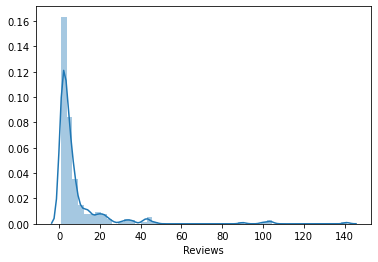

In [ ]:
sns.distplot(df_full.Reviews)

Find the skew value for the column review==5

In [ ]:
s_r = df_full.Reviews
print(type(s_r))
df_r = s_r.to_frame()
skewVal = df_r.skew(axis = 0)
skewVal

<class 'pandas.core.series.Series'>


Reviews    4.899472
dtype: float64

###TODO: Category and Reviews (6 marks)  

- List the unique Categories
- Display the average review for each unique Category 
- Sort and display the results using descending review


Result as follows:

```
               category        review
20               SOCIAL  2.186789e+06
6         COMMUNICATION  1.958544e+06
17                 GAME  1.318002e+06
30        VIDEO_PLAYERS  6.898731e+05
22          PHOTOGRAPHY  6.720308e+05
21             SHOPPING  4.699553e+05
9         ENTERTAINMENT  4.285650e+05
25                TOOLS  3.726878e+05
27         PRODUCTIVITY  3.070486e+05
24     TRAVEL_AND_LOCAL  2.710488e+05
32  MAPS_AND_NAVIGATION  2.472505e+05
26      PERSONALIZATION  2.441312e+05
18               FAMILY  2.310824e+05
23               SPORTS  2.283990e+05
29              WEATHER  1.947293e+05
8             EDUCATION  1.795715e+05
31   NEWS_AND_MAGAZINES  1.787145e+05
3   BOOKS_AND_REFERENCE  1.235752e+05
13   HEALTH_AND_FITNESS  1.177293e+05
12       FOOD_AND_DRINK  7.237033e+04
5                COMICS  5.830940e+04
11              FINANCE  5.362640e+04
4              BUSINESS  4.576928e+04
16            LIFESTYLE  4.203134e+04
14       HOUSE_AND_HOME  4.109399e+04
7                DATING  3.487525e+04
0        ART_AND_DESIGN  2.810356e+04
28            PARENTING  1.907218e+04
1     AUTO_AND_VEHICLES  1.594014e+04
15   LIBRARIES_AND_DEMO  1.583422e+04
2                BEAUTY  9.407929e+03
19              MEDICAL  4.623930e+03
10               EVENTS  3.568667e+03
```





In [ ]:

#add code
cat_list = list(df['Category'].unique())#add code)
cat_review = []
#print(cat_list)

for i in cat_list:
    #extract row with that category in i
    x = df[df.Category == i].Reviews #add code: ]
    
    #mean  = x.groupby('Category')['Reviews'].mean()
    #print("This is category ", i)
    if(len(x)!=0):
        #add code:
        review = x.mean()
        #review = get averge of review in this category
        #store into cat_review
        cat_review.append(review)


#print(cat_review)
#sorting
##construct a Dataframe to add into the category_list and category_review as the 2 columns
data_cat_rev = pd.DataFrame({'Category': cat_list , 'review': cat_review})#add code: construct Dataframe
#data_cat_rev #add code: sort base in reviews as the descending order 
print(data_cat_rev.sort_values('review',ascending=False))




               Category        review
20               SOCIAL  2.186789e+06
6         COMMUNICATION  1.958544e+06
17                 GAME  1.318002e+06
30        VIDEO_PLAYERS  6.898731e+05
22          PHOTOGRAPHY  6.720308e+05
21             SHOPPING  4.699553e+05
9         ENTERTAINMENT  4.285650e+05
25                TOOLS  3.726878e+05
27         PRODUCTIVITY  3.070486e+05
24     TRAVEL_AND_LOCAL  2.710488e+05
32  MAPS_AND_NAVIGATION  2.472505e+05
26      PERSONALIZATION  2.441312e+05
18               FAMILY  2.310824e+05
23               SPORTS  2.283990e+05
29              WEATHER  1.947293e+05
8             EDUCATION  1.795715e+05
31   NEWS_AND_MAGAZINES  1.787145e+05
3   BOOKS_AND_REFERENCE  1.235752e+05
13   HEALTH_AND_FITNESS  1.177293e+05
12       FOOD_AND_DRINK  7.237033e+04
5                COMICS  5.830940e+04
11              FINANCE  5.362640e+04
4              BUSINESS  4.576928e+04
16            LIFESTYLE  4.203134e+04
14       HOUSE_AND_HOME  4.109399e+04
7           